In [1]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt
from time import sleep
from datetime import date

In [2]:


%matplotlib notebook
plt.rcParams["animation.html"] = "jshtml"
plt.style.use(['dark_background'])


class main():
    def __init__(self, camera_index = 0, data_iimit = 150, min_pxl_brtns = 225):
        self.data_limit = data_iimit
        self.low_pxl_limit = min_pxl_brtns
        self.cam_index = camera_index
        
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111)
        self.ax.set_xlabel("Frame")
        self.ax.set_ylabel("Light Avrg")
        self.ax.set_title("Image Average Brightness (max of 255, min of 0)")
        self.fig.show()
        
        
    
    def run_program(self):
        cv_operation()


    def cv_operation(self):
        cap = cv.VideoCapture(self.cam_index)
        if not cap.isOpened():
            print("Cannot open camera")
            exit()
        
        light_data = []
        today = date.today()
        
       
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Can't receive frame (stream end?). Exiting ...")
                break
            
            gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
            cv.imshow('frame', gray)
            
            image_arr = np.array(gray)
            max_light_val = np.max(image_arr)
            
            max_pxl_limit = 255
            low_pxl_limit = self.low_pxl_limit
            

            n_pixel_read_total = 0
            sum_of_all_array = 0
            
            while low_pxl_limit != max_pxl_limit:
                n_pxl_in_array = np.count_nonzero(image_arr == low_pxl_limit)
                sum_of_all_array = sum_of_all_array + (n_pxl_in_array * low_pxl_limit)
                n_pixel_read_total = n_pixel_read_total + n_pxl_in_array
                
                low_pxl_limit = low_pxl_limit + 1
            
            
            if n_pixel_read_total == 0:
                avg_pxl_val = 0
            elif n_pixel_read_total != 0:
                avg_pxl_val = sum_of_all_array / n_pixel_read_total
            else:
                print("FATAL ERROR")
                break
                

            
            light_data.append(avg_pxl_val)
            arr_size = len(light_data)
            x_axis = [i for i in range(arr_size)]
            
            
            
            data_plot = self.ax.plot(x_axis, light_data, label = "data")
            self.fig.canvas.draw()
            
            if arr_size == self.data_limit:
                light_data.clear()
                x_axis.clear()
                plt.cla()
                

            
            if cv.waitKey(1) == ord('q'):
                break
        cap.release()
        cv.destroyAllWindows()

<h4>parameter: </h4>
<br><br>
camera_index: default 0, index of camera to use. 0 means the program will use the camera on the device<br><br>
data_iimit: default 150, this will limit the number of data on on plot in x-axis (this will affect program performnce)<br><br>
min_pxl_brtns: default 0, this will limit on how many pixel will be calculate (maximum value: 255)(greatly affect the program performnce)



<IPython.core.display.Javascript object>


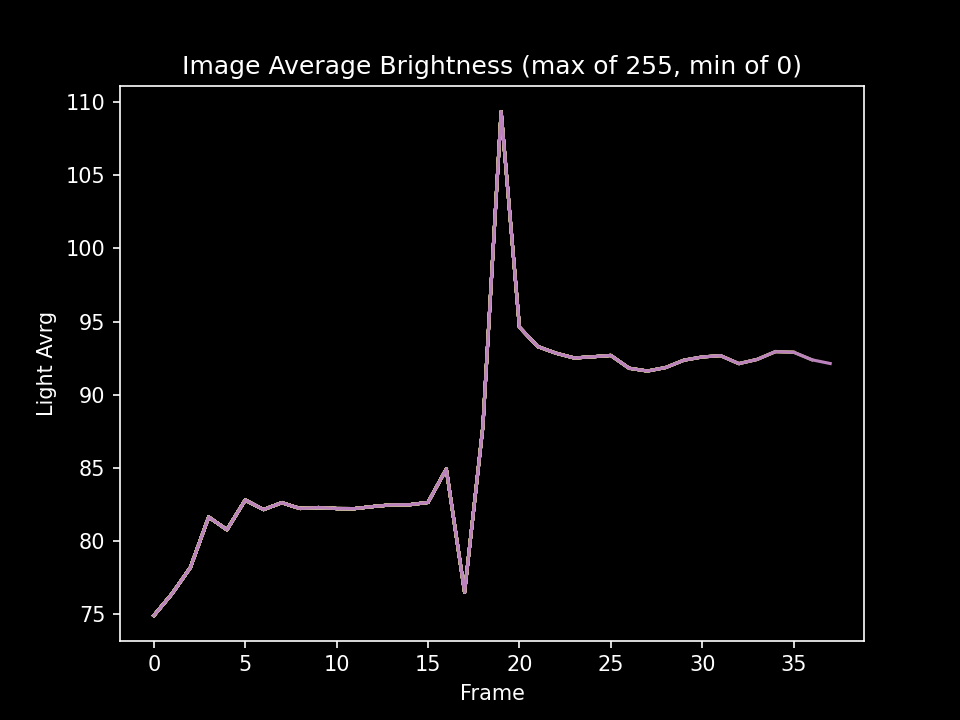

In [3]:
samp = main(camera_index = 0, data_iimit = 200, min_pxl_brtns = 0)
samp.cv_operation()

In [4]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
